<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/LinearRegresionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real estate assets

This project is about the value of real estate assets. We going to predict using the value with different data. This dataset was obtained from: https://archive.ics.uci.edu/ml/index.php

First we import the data and add the tittle of each colummn.

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Second, we analize the data in general, visual and numeric.

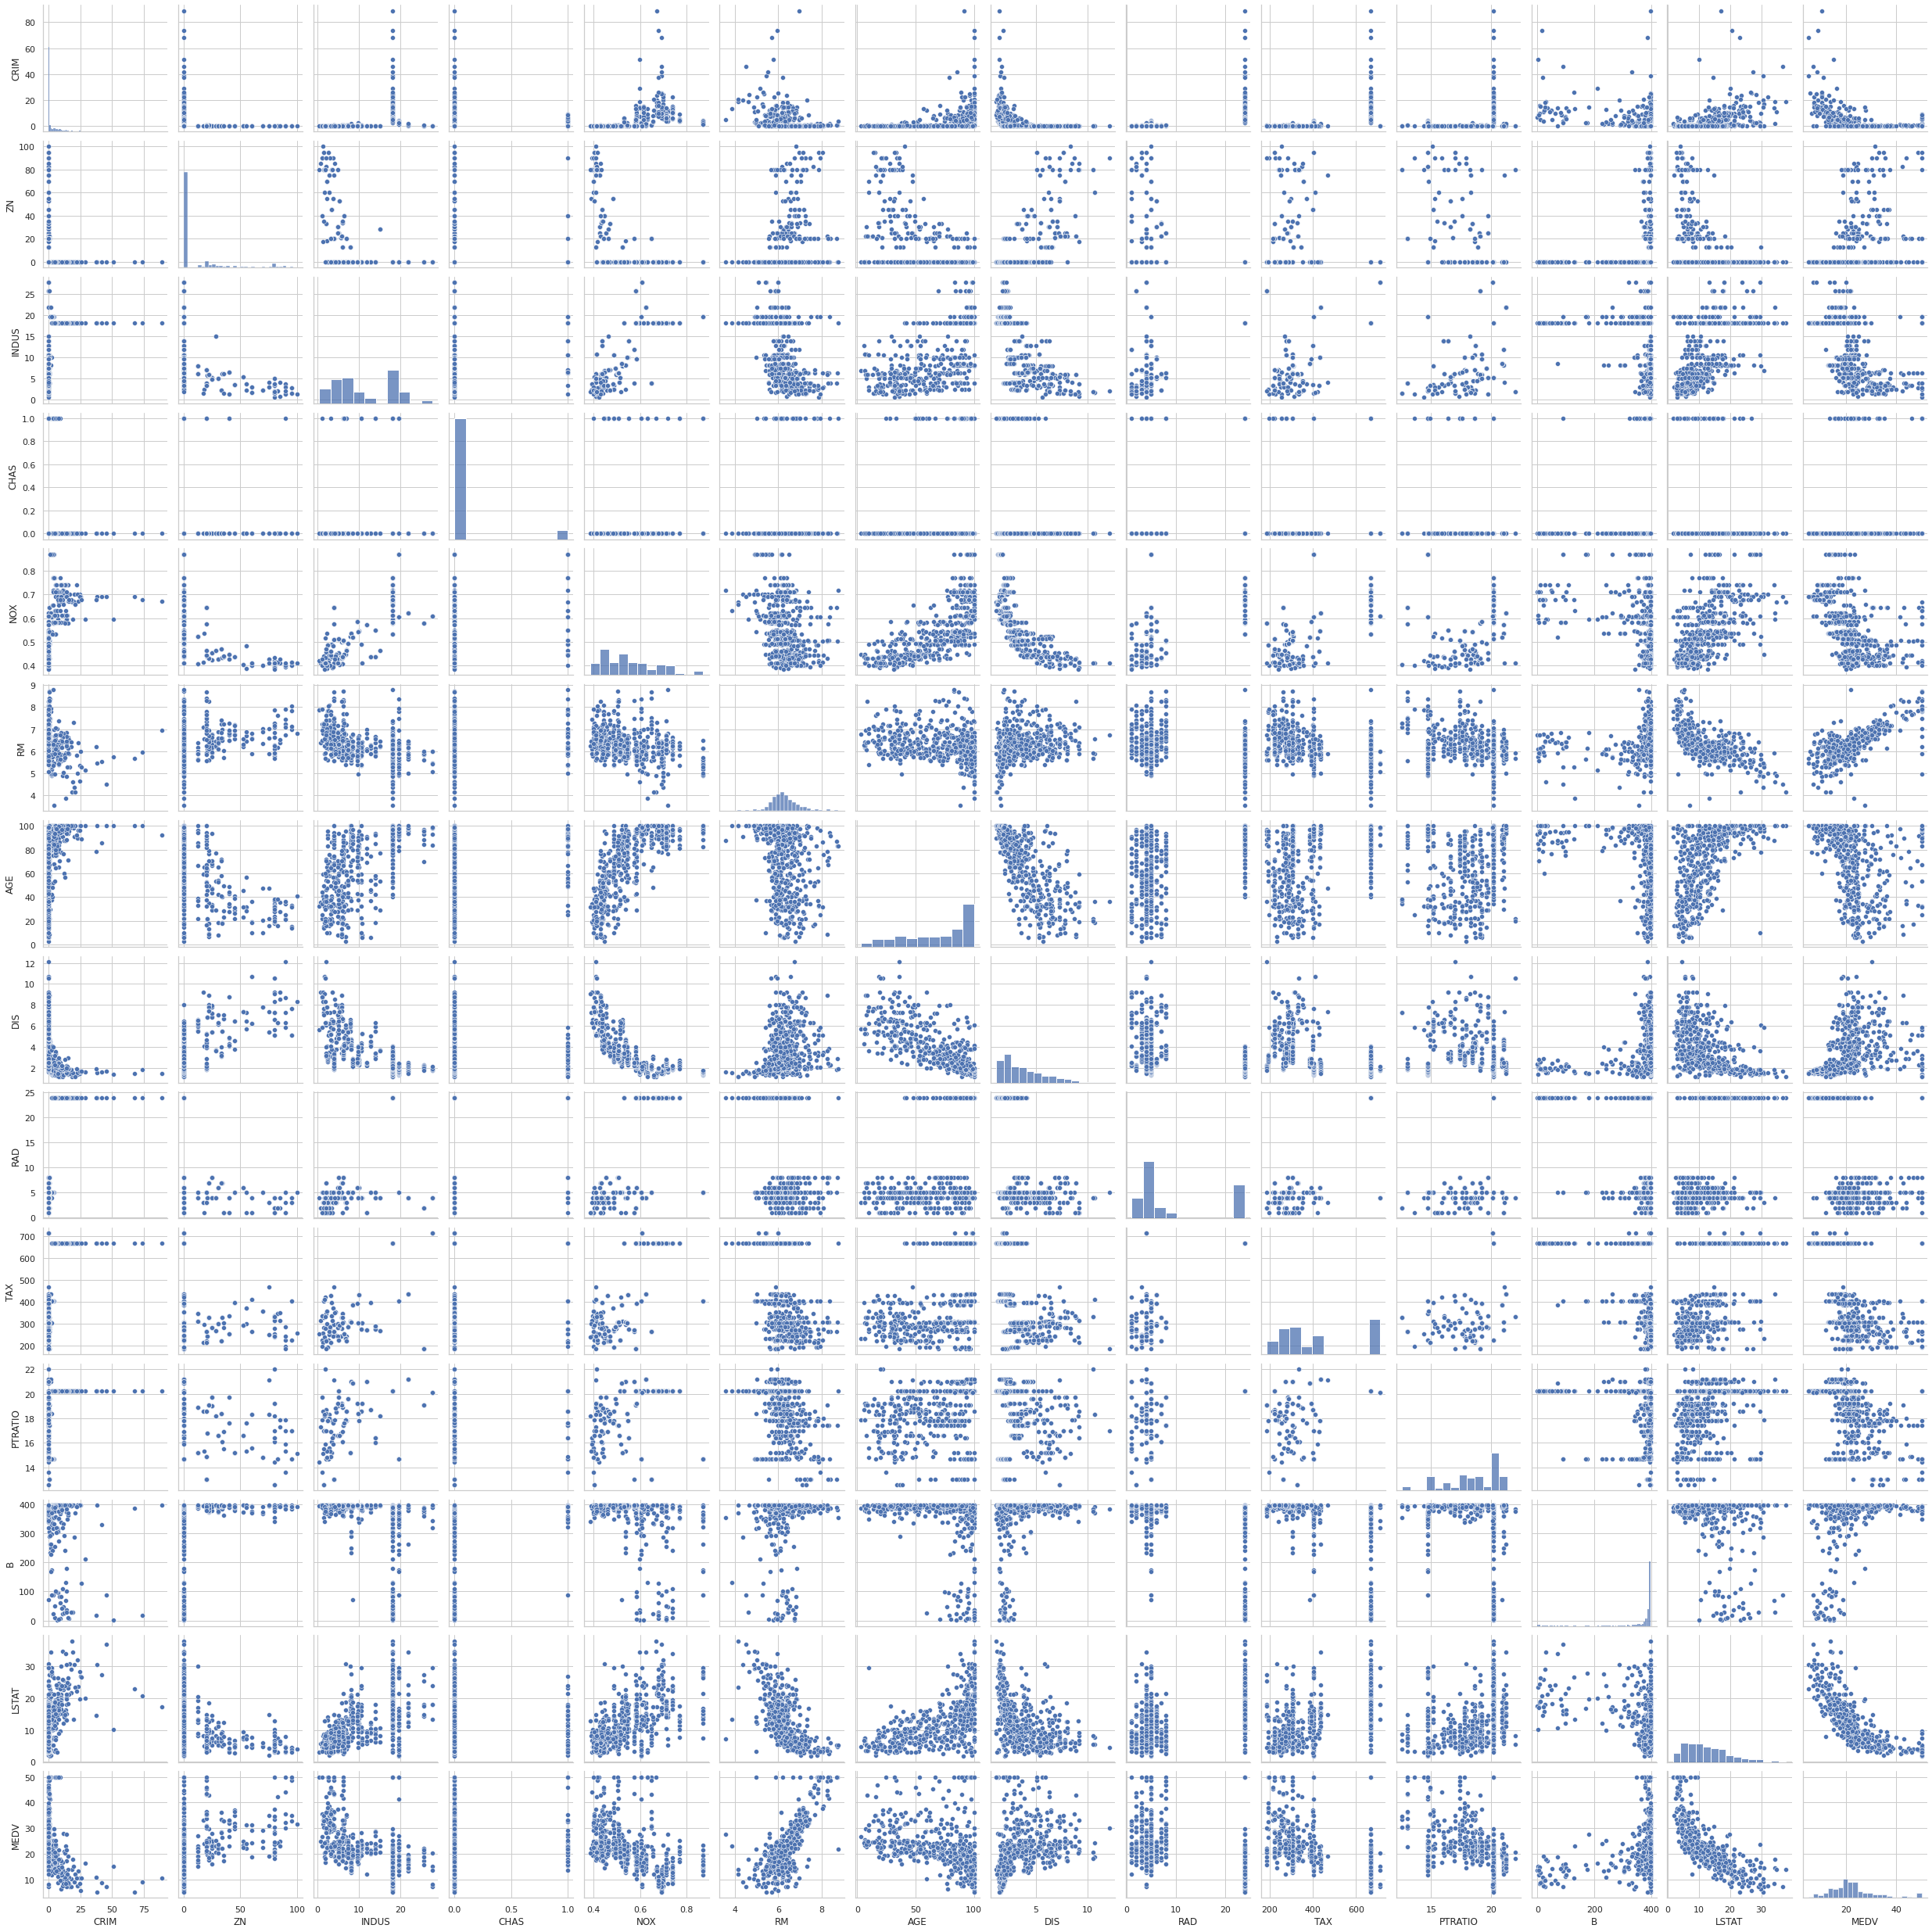

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

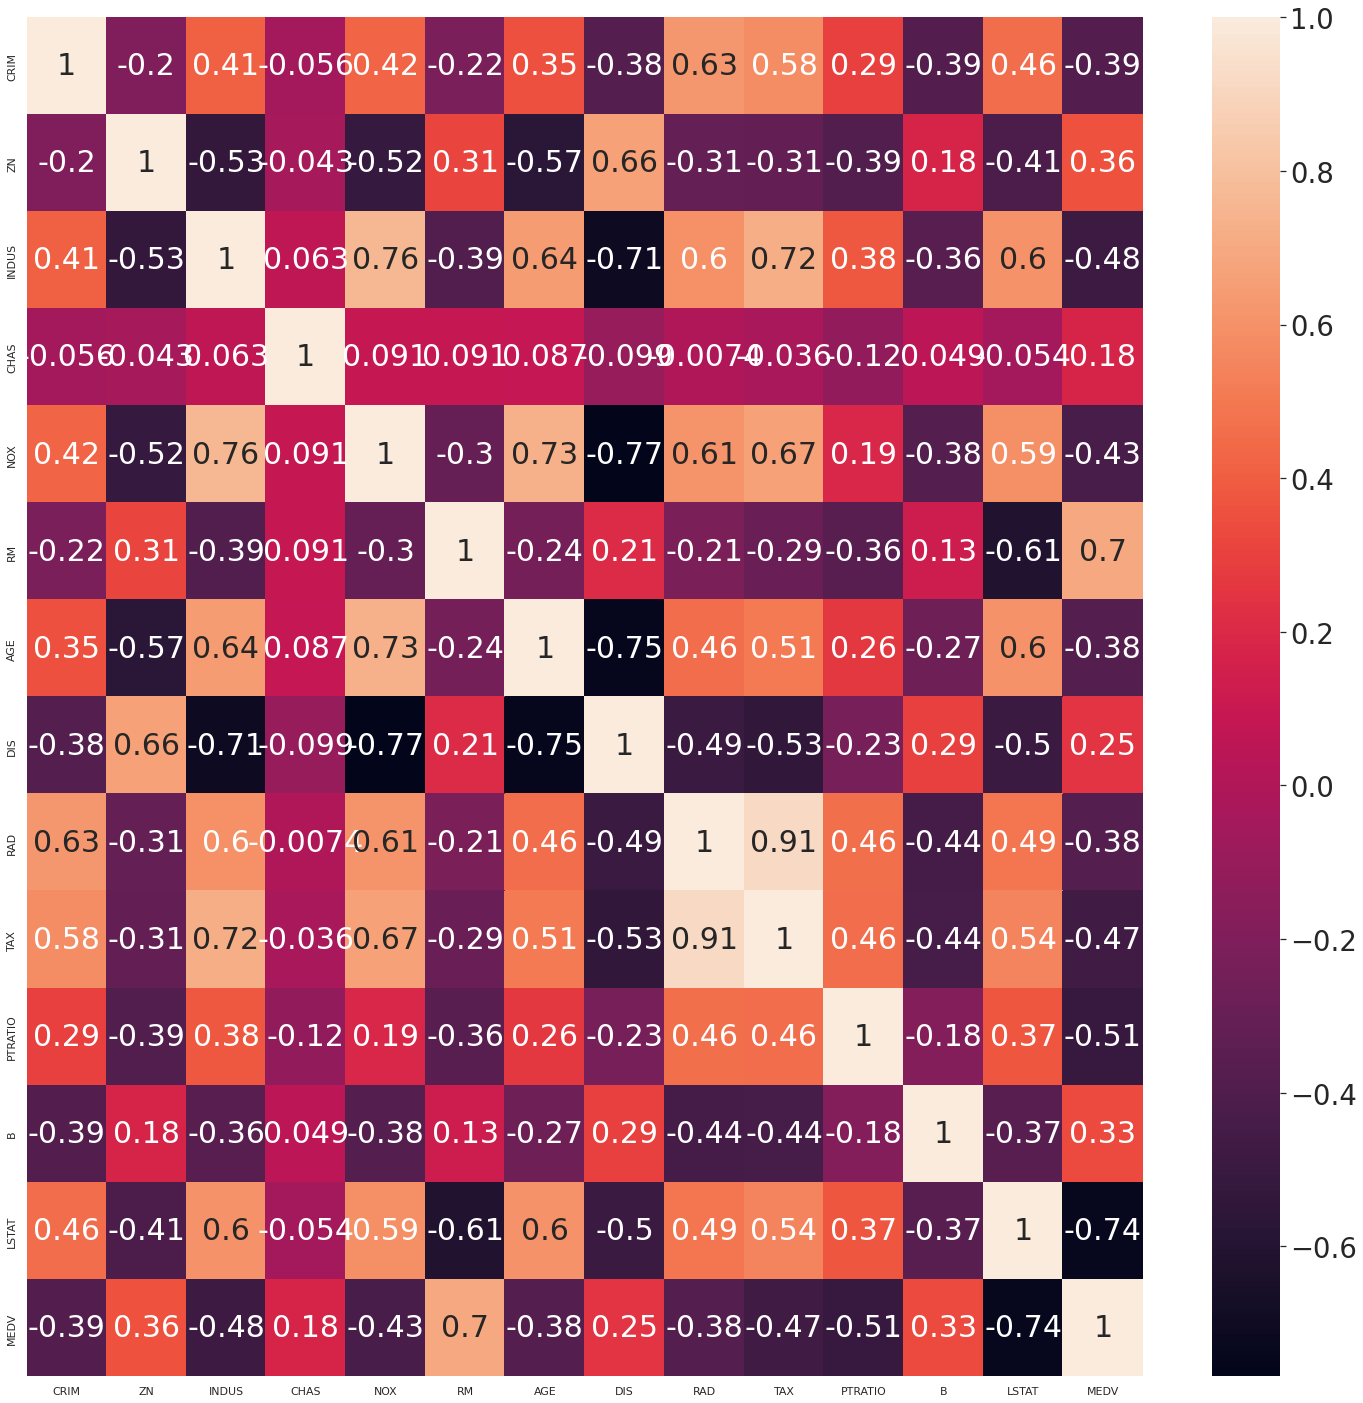

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))   
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

The variable that we want to know is MEDV, represent the value of the property in $1000, we can order the correlation which are involved only with MEDV.

In [6]:
correlation_mat = df.corr()
correlation_mat['MEDV'].sort_values(kind="quicksort")

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [ ]:
According to the correlation list values, we going to put our attention in LSTAT, RM and PTRATIO. The 3 variables that have more impact in MEDV.

#Linear Regression

First we do a multivariable Regresion wit RM AND INDUS, regresion only with RM.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['RM','LSTAT']]
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
reg = slr.fit(X_std, y_std)
z_pred = slr.predict(X_std)

# Los coeficientes
print('Coefficients: \n', reg.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(y_std, z_pred))
print('Variance score: %.2f' % r2_score(y_std, z_pred))


Coefficients: 
 [[ 0.38921875 -0.49875704]]
Mean squared error: 0.36
Variance score: 0.64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


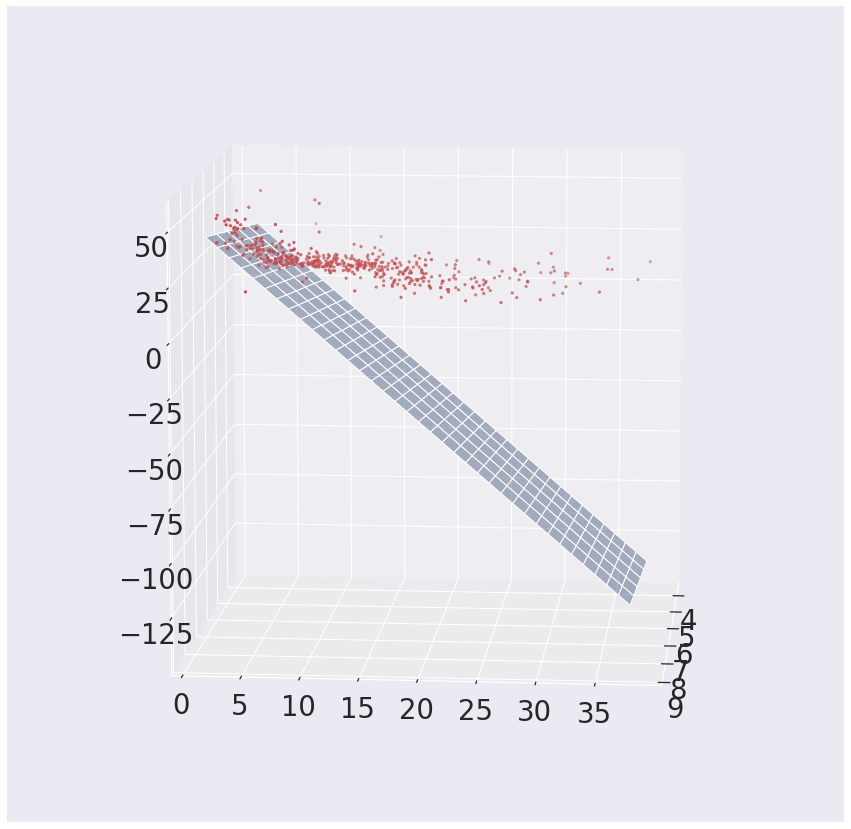

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np

#Plain definition
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['LSTAT'].min(),df['LSTAT'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({'RM': X1.ravel(), 'LSTAT': X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)


fig = plt.figure(figsize=(15,15))

ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,pred, alpha= 0.4)

ax.scatter3D(df['RM'],df['LSTAT'],df['MEDV'], color = 'R', marker = '.')
ax.view_init(elev=10, azim=5)

#plt.show()



In [41]:


X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
reg = slr.fit(X_std, y_std)


# Los coeficientes
print('Coefficients: \n', reg.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(X_std, slr.predict(X_std)))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(X_std, slr.predict(X_std)))


Coefficients: 
 [[0.69535995]]
Mean squared error: 0.09
Variance score: 0.91


Text(0.5, 0, 'Promedio de habitaciones [RM]')

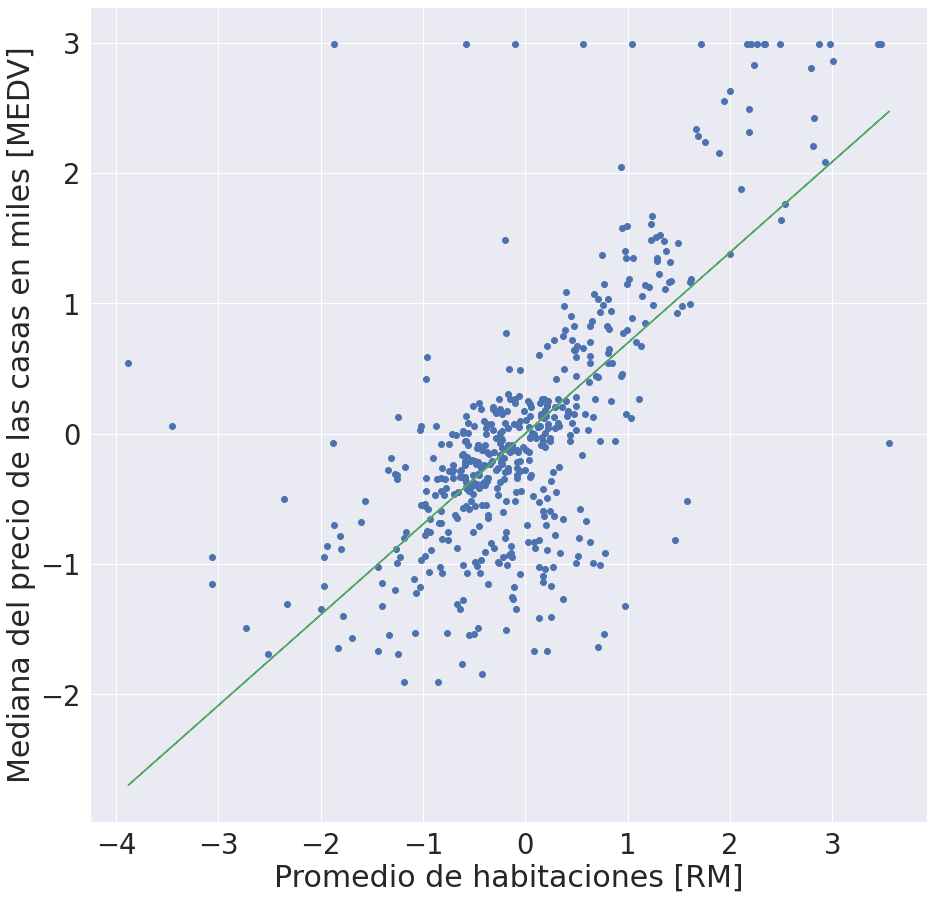

In [42]:
fig, ax = plt.subplots(figsize=(15,15))  
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='G')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

Evaluate the MSE and the variance, and watching the both graph we decided to use single model regresion with the parameter RM for this case.

Using the preddiction model create only with the parameter RM

In [38]:
num_rooms = 5
num_rooms_std = sc_x.transform(np.array([num_rooms]).reshape(-1,1))
print("The value of a house with 5 rooms in boston is ", sc_y.inverse_transform(slr.predict(num_rooms_std)))

The value of a house with 5 rooms in boston is  [[10.83992413]]
